In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Data:
    def __init__(self, X=None, y=None):
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """

        self.X = X
        self.y = y

    def load(self, filename):
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """

        # Load data
        with open(filename, "r") as fid:
            data = np.loadtxt(fid, delimiter=",")

        # Separate features and labels
        self.X = data[:, :-1]
        self.y = data[:, -1]

    def plot(self, **kwargs):
        """Plot data."""

        if "color" not in kwargs:
            kwargs["color"] = "b"

        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel("x", fontsize=16)
        plt.ylabel("y", fontsize=16)
        plt.show()

In [4]:
# Wrapper functions around Data class
def load_data(filename):
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs):
    data = Data(X, y)
    data.plot(**kwargs)

In [5]:
class PolynomialRegression:
    def __init__(self, m=1, reg_param=0):
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
            lambda_ -- float
                       regularization parameter
        """

        self.coef_ = None
        self.m_ = m

    def generate_polynomial_features(self, X):
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """

        n, d = X.shape

        # Modify to create matrix for simple linear model
        m = self.m_
        Phi = np.ones((n, d))
        for i in range(1, m+1):
          Phi = np.hstack((Phi, X**i))

        return Phi

    def fit_GD(self, X, y, eta=None, eps=0, tmax=10000, verbose=False):
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """

        X = self.generate_polynomial_features(X)  # map features
        n, d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)  # coefficients
        err_list = np.zeros((tmax, 1))  # errors per iteration

        # SGD loop
        for t in range(tmax):
            if eta_input is None:
                eta = 1/(1+t)
            else:
                eta = eta_input
                
            # Update w (self.coef_) using one step of GD
            y_pred = np.dot(X, self.coef_)
            self.coef_ -= 2*eta*np.dot(X.T, y_pred - y)

            # Track error
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)

            # Stop iterations
            if t > 0 and abs(err_list[t] - err_list[t - 1]) <= eps:
                break

            # Debug
            if verbose:
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                print ("iteration: %d, cost: %f" % (t+1, cost))

        print("number of iterations: %d" % (t + 1))

        return self

    def fit(self, X, y, l2regularize=None):
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            l2regularize    -- set to None for no regularization. set to positive double for L2 regularization
                
        Returns
        --------------------        
            self    -- an instance of self
        """

        X = self.generate_polynomial_features(X)  # map features

        # Implement closed-form solution
        XTX_inv = np.linalg.pinv(np.dot(X.T, X))
        self.coef_ = np.dot(XTX_inv.dot(X.T), y)

    def predict(self, X):
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None:
            raise Exception("Model not initialized. Perform a fit first.")
        
        # Predict y
        X = self.generate_polynomial_features(X)  # map features
        y = np.dot(X, self.coef_)

        return y

    def cost(self, X, y):
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(w)
        """
        # Compute J(w)
        y_pred = self.predict(X)
        cost = np.sum((y_pred - y) ** 2)
        
        return cost

    def rms_error(self, X, y):
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        
        # Compute RMSE
        N = X.shape[0]
        error = np.sqrt(self.cost(X,y)/N)
        
        return error

    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs):
        """Plot regression line."""
        if "color" not in kwargs:
            kwargs["color"] = "r"
        if "linestyle" not in kwargs:
            kwargs["linestyle"] = "-"

        X = np.reshape(np.linspace(0, 1, n), (n, 1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()

Visualizing data...


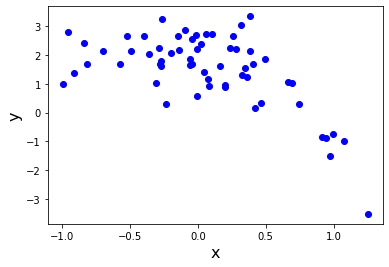

Investigating linear regression...

eta:  1e-05
number of iterations: 10000
cost:  60.48308903597062
coefficients:  [ 1.58572635 -1.41669696]

eta:  0.0001
number of iterations: 4722
cost:  60.41076204171496
coefficients:  [ 1.5912286  -1.48402773]

eta:  0.01
number of iterations: 49
cost:  60.41076204171103
coefficients:  [ 1.59122864 -1.48402821]

eta:  0.0168
number of iterations: 10000
cost:  1.0334852857059495e+224
coefficients:  [-1.30489153e+111 -1.06471386e+110]

eta:  None
number of iterations: 358
cost:  60.41076204171108
coefficients:  [ 1.59122863 -1.48402817]

closed form solution
cost:  60.41076204171104
coefficients:  [ 1.59122864 -1.48402822]

Investigating polynomial regression...

Best Train Degree:  10
Best Test Degree:  3


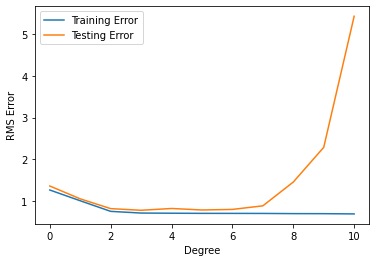

Done!


In [6]:
def main():
    # Load data with correct file path
    train_data = load_data("./train.csv")
    test_data = load_data("./test.csv")

    # Main code for visualizations
    print("Visualizing data...")
    train_data.plot()
    
    # Main code for linear regression
    print("Investigating linear regression...")
    print()
    
    model = PolynomialRegression(1)
    
    # Stochastic gradient Descent for linear regression
    for eta in [10e-6, 10e-5, 10e-3, 0.0168, None]:
      print('eta: ', eta)
      model.fit_GD(train_data.X, train_data.y, eta=eta)
      print('cost: ', model.cost(train_data.X, train_data.y))
      print('coefficients: ', model.coef_)
      print()
    
    # Closed-form solution for linear regression
    model.fit(train_data.X, train_data.y)
    print('closed form solution')
    print('cost: ', model.cost(train_data.X, train_data.y))
    print('coefficients: ', model.coef_)
    print()
    
    # Main code for polynomial regression
    print("Investigating polynomial regression...")
    print()
    
    train_rmse = []
    test_rmse = []

    for i in range(11):
      model = PolynomialRegression(i)

      # Find RMSE for training data
      model.fit(train_data.X, train_data.y)
      train_rmse.append(model.rms_error(train_data.X, train_data.y))

      # Find RMSE for testing Data
      test_rmse.append(model.rms_error(test_data.X, test_data.y))

    # Plot results
    plt.plot(np.arange(11), train_rmse, label='Training Error')
    plt.plot(np.arange(11), test_rmse, label='Testing Error')
    print('Best Train Degree: ', np.argmin(train_rmse))
    print('Best Test Degree: ', np.argmin(test_rmse))
    plt.xlabel('Degree')
    plt.ylabel('RMS Error')
    plt.legend()
    plt.show()

    print("Done!")

if __name__ == "__main__":
    main()